**Pressione SHIFT+ENTER para executar a célula**

# Alegrete

Este notebook fornece algumas visualizações para o trabalho de regressão linear. Para conseguir usar, implemente as funções no seu `alegrete.py` e tenha as bibliotecas `numpy` e `matplotlib` instaladas.

O notebook usa um conjunto de dados sintetico. Adapte-o para carregar e usar os dados do `alegrete.csv`.

### Imports das bibliotecas de plot e da solucao implementada

In [2]:
%matplotlib inline
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import alegrete

### Visualizacao dos dados

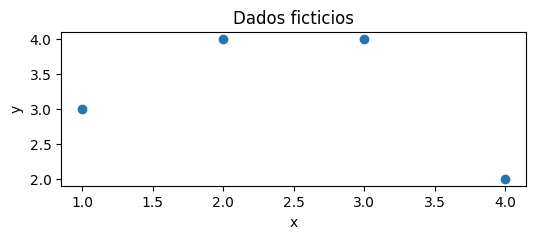

In [3]:
# dataset ficticio -- troque para carregar o alegrete.csv
dataset = np.array([
    [1, 3],
    [2, 4],
    [3, 4],
    [4, 2]
])

#Gráfico dos dados
plt.figure(figsize=(6, 2))
plt.scatter(dataset[:,0], dataset[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dados ficticios')
plt.show()

### Execucao da regressao linear e calculo do EQM por epoca/iteracao

Considere o parâmetro b o coeficiente linear (theta_0, visto em aula) e w o coeficiente angular (theta_1, visto em aula).

Iteração 1/100: b = 0.65, w = 1.55, MSE = 6.478750000000002
Iteração 2/100: b = 0.39499999999999996, w = 0.44999999999999973, MSE = 4.2710250000000025
Iteração 3/100: b = 0.7410000000000001, w = 1.1275000000000002, MSE = 3.2181403750000013
Iteração 4/100: b = 0.67905, w = 0.6157499999999998, MSE = 2.6873945587500003
Iteração 5/100: b = 0.8853650000000002, w = 0.9026000000000001, MSE = 2.394501628225
Iteração 6/100: b = 0.9069920000000001, w = 0.6560174999999999, MSE = 2.2116205621608747
Iteração 7/100: b = 1.0475848500000002, w = 0.7684952499999999, MSE = 2.0811631434785536
Iteração 8/100: b = 1.1038202550000002, w = 0.64195995, MSE = 1.9770945819222199
Iteração 9/100: b = 1.2120762290000002, w = 0.6771098974999998, MSE = 1.8875575407521965
Iteração 10/100: b = 1.2811060344500003, w = 0.60540693675, MSE = 1.8070700207834154
Iteração 11/100: b = 1.3721813591850003, w = 0.6067435143999999, MSE = 1.7330217679211444
Iteração 12/100: b = 1.4443733301480004, w = 0.5605375632074999, MSE = 1.6

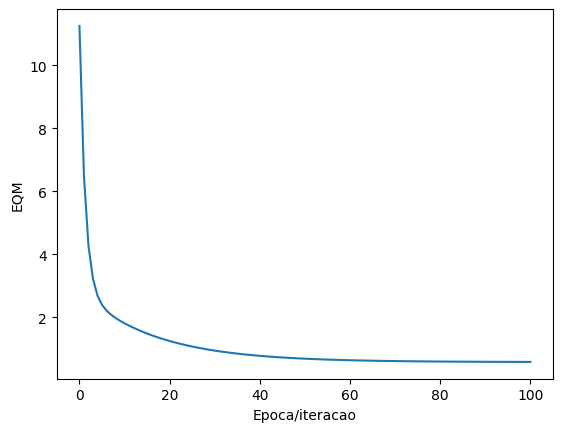

In [4]:
b_history, w_history = alegrete.fit(
    dataset, b=0, w=0,
    alpha=0.1, num_iterations=100
)

# valores finais de theta0 e theta1
final_b, final_w = b_history[-1], w_history[-1]

mse_list = [alegrete.compute_mse(b, w, dataset) for b, w in zip(b_history, w_history)]
print(f"EQM final: {mse_list[-1]}")


plt.plot(mse_list)
plt.xlabel('Epoca/iteracao')
plt.ylabel('EQM')
plt.show()

### Plot da curva final

Curva encontrada: -0.24015929916514614*x + 3.8240610421703947


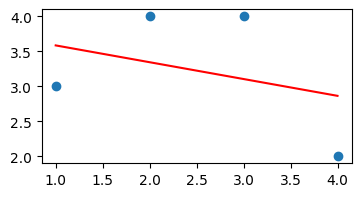

In [5]:
#Imprimir parâmetros otimizados
print (f'Curva encontrada: {final_w}*x + {final_b}')

#plota os dados
plt.figure(figsize=(4, 2))
plt.scatter(dataset[:,0], dataset[:,1])

# plota a curva de ajuste
pred = final_w*dataset[:,0] + final_b
plt.plot(dataset[:,0], pred, c='r')
plt.show()




### Progresso da descida do gradiente com o número de iterações

Execute a celula e use os controles abaixo do grafico para visualizar o progresso do seu ajuste

Pode aparecer um grafico "extra" abaixo da animacao, apenas ignore.

C:\Users\Pichau\AppData\Local\Temp\ipykernel_11860\1673762163.py:18: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=101.
  ani = animation.FuncAnimation(fig, animate, frames=len(b_history), interval=20, save_count=50)


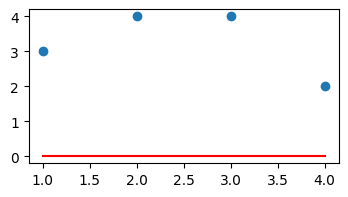

In [6]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot(111)

# conjunto de dados
ax.scatter(dataset[:,0], dataset[:,1])

# linha com os valores iniciais dos parametros
pred = w_history[0]*dataset[:,0] + b_history[0]
line, = ax.plot(dataset[:,0], pred, '-',c='r')

# funcao que atualiza a linha a cada passo
def animate(i):
    pred = w_history[i] * dataset[:,0] + b_history[i]
    line.set_ydata(pred)
    return line,

# mude interval para trocar a velocidade da animacao
ani = animation.FuncAnimation(fig, animate, frames=len(b_history), interval=20, save_count=50)
HTML(ani.to_jshtml())